# Alumno: Gerardo de Miguel González

1.- Crea una función que genere dos muestras que se distribuyen según dos gaussianas distintas. La función recibirá como valores de entrada: el número N de puntos a generar para cada categoría, y mu1, sigma1, mu2, sigma2 que son los correspondientes parámetros de las dos gaussianas. Como output devolverá un valor con longitud 2N que contenga la muestra x generada, y otro vector de longitud 2N que contenga 0 o 1 en función de la categoría asociada a ese elemento.

In [17]:
muestras <- function(puntos = 10,mu.1 = 0,sigma.1 = 1, mu.2 = 0,sigma.2 = 1) {
    # https://stats.stackexchange.com/questions/86285/random-number-set-seedn-in-r
    set.seed(1)
    x1 <- rnorm(n = puntos,mean = mu.1,sd = sigma.1)
    x2 <- rnorm(n = puntos,mean = mu.2,sd = sigma.2)
    y1 <- rep(0,length(x1))
    #::GMG::http://www.cookbook-r.com/Basics/Making_a_vector_filled_with_values/
    y2 <- rep(1, length(x2))
    m <- t(cbind(rbind(x1,y1),rbind(x2,y2)))
    # https://stackoverflow.com/questions/32658793/how-to-remove-column-names-from-a-matrix-in-r
    colnames(m) <- NULL
    # http://www.cookbook-r.com/Manipulating_data/Randomizing_order/
    # http://r.789695.n4.nabble.com/Permuting-rows-of-a-matrix-td3298688.html
    return(m[sample(nrow(m)),])
}

In [20]:
M <- muestras(puntos = 20)
dim(M)

[1] 40  2

2.- Crea una función que calcule el valor de la sigmoide para un valor de entrada Z. 

::GMG::https://helloacm.com/quick-r-tutorial-how-to-plot-sigmoid-function-using-r/

In [1]:
sigmoid = function(x) {
   1 / (1 + exp(-x))
}

In [2]:
# you can use the equal sign as well, the programmer way.
x <- seq(-5, 5, 0.01)

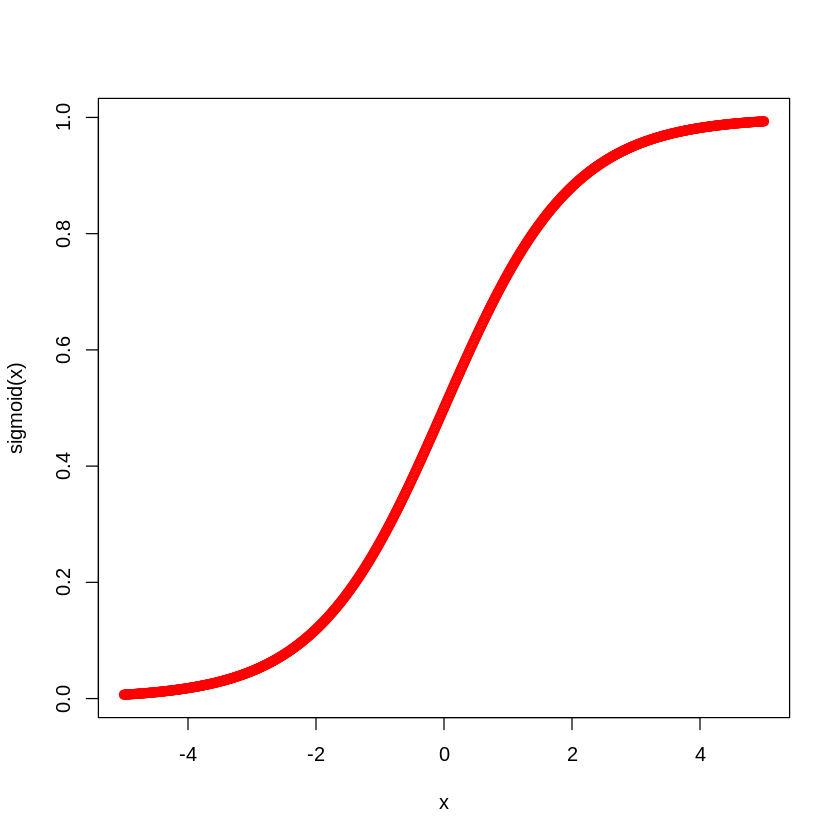

In [3]:
plot(x, sigmoid(x), col='red')

3.- Crea una función que calcule el valor de la función de Loss y que reciba como entrada “x” e “y” y los parámetros del modelo que vamos a asumir: z = a + b x (es decir, a y b). 

In [ ]:
loss <- function (x,y,a,b) {
    
}

4.- Crea una función que devuelva el gradiente de la función de Loss y que reciba como entrada “x” e “y” y los parámetros (a, b) del modelo que vamos a asumir.

5.- Generar un par de vectores “x”, “y” con N = 100, mu = (2, 6), mu = (4,3), sigmax = 1 y sigmay = 1

6.- Calcular la función de coste y el gradiente para (a = 0, b = 0). Actualizar los valores de a y b de manera que (a, b)_nuevos = (a, b)_viejos + lambda * gradiente. Repite 3 o 4 cuatro veces y observa los valores de la función de coste. Intenta encontrar el mínimo aproximadadamente. Interpreta los resultados.